In [1]:
import os
cwd = os.getcwd()
jaxqualin_path = os.path.join(cwd, os.pardir, os.pardir)

In [2]:
import sys
sys.path.insert(0, jaxqualin_path)

In [3]:
import jaxqualin.postprocess
import jaxqualin.plot
import jaxqualin.qnmode

from jaxqualin.postprocess import *
from jaxqualin.plot import *
from jaxqualin.qnmode import *

2023-10-04 11:51:01.686457: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-10-04 11:51:03.550899: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-10-04 11:51:03.703083: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [4]:
from importlib import reload

In [30]:
reload(jaxqualin.postprocess)
from jaxqualin.postprocess import *
reload(jaxqualin.plot)
from jaxqualin.plot import *
reload(jaxqualin.qnmode) 
from jaxqualin.qnmode import *

In [6]:
import pandas as pd
from matplotlib import ticker 
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [7]:
runname = "normal2_prodB1"
df = pd.read_csv(f"../../pickle/data_frame/{runname}_physical.csv")
df_prime = pd.read_csv(f"../../pickle/data_frame/normal2_prodB3_physical.csv")

In [8]:
df_full = pd.concat([df, df_prime])

In [9]:
df_nonspin = df_full[((np.abs(df_full['chi_1_z']) < 0.01) & (np.abs(df_full['chi_2_z']) < 0.01))]

In [10]:
df = classify_modes(df_full)

In [79]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [12]:
from scipy.optimize import curve_fit
def fitfunc(x, a, b, c):
    return a**(x**b + c)

In [13]:
run_type = 'chi_p'
mode_tuple_list = [(2, 2, "2.2.0"), (2, 2, "2.-2.0")]
cmap=cm.get_cmap('viridis')
normalizer=Normalize(0.05,0.25)

# plt.savefig(f"../../plots/{runname}_r2.2.0_vs_2.2.0.pdf", bbox_inches = "tight")
    

In [66]:
chi, eta, ratio, ratio_err = mode_relationship(df, [(2, 2, '2.2.0'), (2, 2, '-2.2.0')], 'chi_p', fit = False, 
                            cmap = cmap, norm = normalizer, ax = axs[0], alpha = alpha,
                            skip_num = [207, 1428])
import plotly.express as px
import plotly.graph_objects as go

df_retro_ratio = pd.DataFrame(data = dict(chi = chi, ratio = np.log10(ratio), eta = eta, sigma = ratio_err/ratio))
from scipy.optimize import curve_fit

def fitfunc(x, a, b, c, d, e, f):
    x0 = x[0]
    x1 = x[1]
    return a*x0**2 + b*x1**2 + c*x0*x1 + d*x0 + e*x1 + f

popt_220, pcov = curve_fit(fitfunc, (df_retro_ratio['chi'], df_retro_ratio['eta']), df_retro_ratio['ratio'], sigma = df_retro_ratio['sigma'])
pred = fitfunc((df_retro_ratio['chi'], df_retro_ratio['eta']), *popt_220)
fig = go.Figure(data = [go.Scatter3d(x = df_retro_ratio['chi'], y = df_retro_ratio['eta'], z = df_retro_ratio['ratio'], mode='markers')])
fig.add_trace(go.Scatter3d(x = df_retro_ratio['chi'], y = df_retro_ratio['eta'], z = pred, mode='markers'))

fig.show()

In [67]:
print(popt_220)

[-1.28131777  1.1677012   1.98313475 -2.99653557 -6.47964877 -2.58442978]


In [68]:
chi, eta, ratio, ratio_err = mode_relationship(df, [(2, 1, '2.1.0'), (2, 1, '-2.1.0')], 'chi_p', fit = False, 
                            cmap = cmap, norm = normalizer, ax = axs[0], alpha = alpha,
                            skip_num = [207, 1428])
import plotly.express as px
import plotly.graph_objects as go

df_retro_ratio = pd.DataFrame(data = dict(chi = chi, ratio = np.log10(ratio), eta = eta, sigma = ratio_err/ratio))
from scipy.optimize import curve_fit

def fitfunc(x, a, b, c, d, e, f):
    x0 = x[0]
    x1 = x[1]
    return a*x0**2 + b*x1**2 + c*x0*x1 + d*x0 + e*x1 + f

popt_210, pcov = curve_fit(fitfunc, (df_retro_ratio['chi'], df_retro_ratio['eta']), df_retro_ratio['ratio'], sigma = df_retro_ratio['sigma'])
pred = fitfunc((df_retro_ratio['chi'], df_retro_ratio['eta']), *popt_210)
fig = go.Figure(data = [go.Scatter3d(x = df_retro_ratio['chi'], y = df_retro_ratio['eta'], z = df_retro_ratio['ratio'], mode='markers')])
fig.add_trace(go.Scatter3d(x = df_retro_ratio['chi'], y = df_retro_ratio['eta'], z = pred, mode='markers'))

fig.show()

In [69]:
print(popt_210)

[-0.64366408  4.49971424  1.14794521 -1.56775349 -5.01553551 -1.12867878]


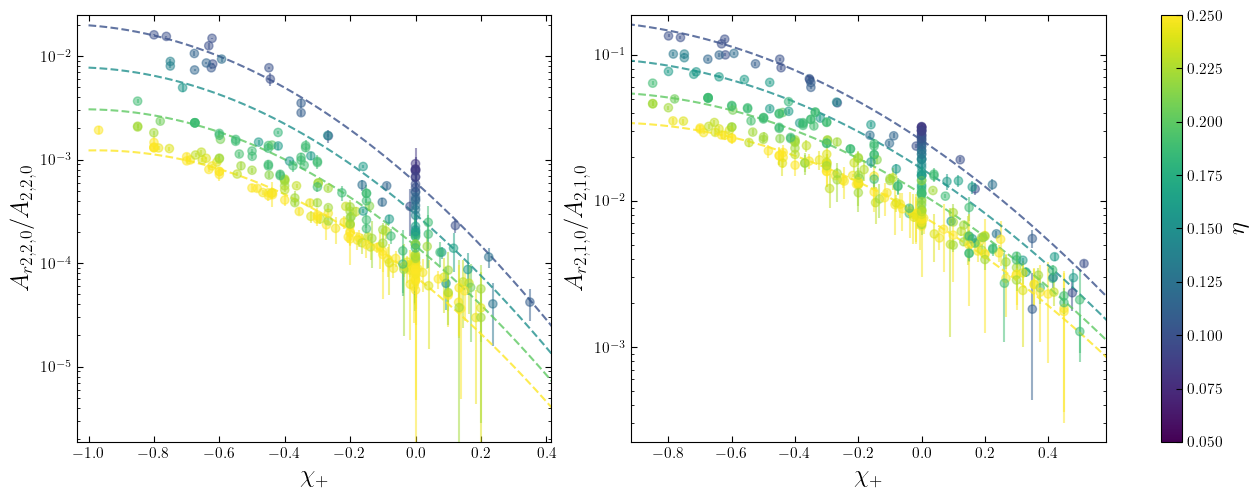

In [81]:
alpha = 0.5

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
for ax in axs:
    ax.set_yscale('log')
sc = plot_mode_relationship(df, [(2, 2, '2.2.0'), (2, 2, '-2.2.0')], 'chi_p', fit = False, 
                            cmap = cmap, norm = normalizer, ax = axs[0], alpha = alpha,
                            skip_num = [207, 1428])
sc = plot_mode_relationship(df, [(2, 1, '2.1.0'), (2, 1, '-2.1.0')], 'chi_p', fit = False, 
                            cmap = cmap, norm = normalizer, ax = axs[1], alpha = alpha)

axs[0].set_ylabel(r"$A_{r2{,}2{,}0}/A_{2{,}2{,}0}$")
axs[1].set_ylabel(r"$A_{r2{,}1{,}0}/A_{2{,}1{,}0}$")

axs[0].set_xlim(axs[0].get_xlim())
axs[0].set_ylim(axs[0].get_ylim())
axs[1].set_xlim(axs[1].get_xlim())
axs[1].set_ylim(axs[1].get_ylim())

eta_list = np.linspace(0.1, 0.25, 4)

chi_p_list = np.linspace(-1, 1, 1000)
for eta in eta_list:
    ratio = 10**fitfunc((chi_p_list, eta), *popt_220)
    axs[0].plot(chi_p_list, ratio, color = cmap(normalizer(eta)), ls = '--', alpha = 0.8)
    ratio = 10**fitfunc((chi_p_list, eta), *popt_210)
    axs[1].plot(chi_p_list, ratio, color = cmap(normalizer(eta)), ls = '--', alpha = 0.8)

im=cm.ScalarMappable(norm=normalizer, cmap=cmap)

fig.tight_layout()
cb = fig.colorbar(im, ax = axs, fraction = 0.02)
cb.ax.set_ylabel(r"$\eta$")

plt.savefig(f"../../plots/{runname}_retro_vs_fund_alpha_{alpha}.pdf", bbox_inches = "tight")

In [72]:
cm.viridis(normalizer(0.1))

(0.229739, 0.322361, 0.545706, 1.0)

In [13]:
def read_B(datapath, l, m, n):
    dat = []
    B_file = os.path.join(datapath, 's2', f'l{l}', f'Bl{l}m{m}n{n}.dat')
    with open(B_file, 'r') as f:
        for line in f:
            vals_string = line.split()
            vals = [float(val) for val in vals_string]
            dat.append(vals)
    return np.array(dat).T

In [14]:
datapath = '../../data/'

In [15]:
data220 = read_B(datapath, 2, 2, 0)
data221 = read_B(datapath, 2, 2, 1)
a_arr = data220[0]
B220 = data220[7] + 1.j*data220[8]
B221 = data221[7] + 1.j*data221[8]
norm_B221_220 = np.abs(B221/B220)

In [16]:
data330 = read_B(datapath, 3, 3, 0)
data331 = read_B(datapath, 3, 3, 1)
B330 = data330[7] + 1.j*data330[8]
B331 = data331[7] + 1.j*data331[8]
norm_B331_330 = np.abs(B331/B330)

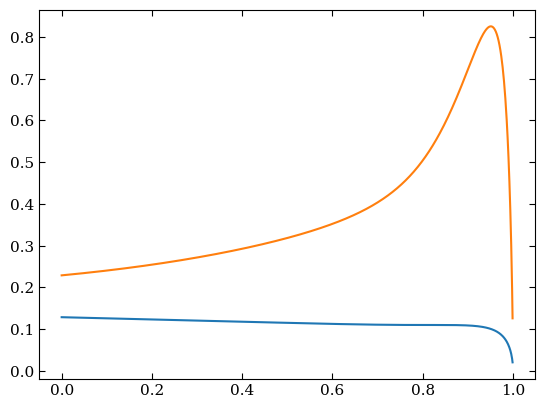

In [17]:
plt.plot(a_arr, np.abs(B220), label = r"$B_{220}$")
plt.plot(a_arr, np.abs(B221), label = r"$B_{221}$")

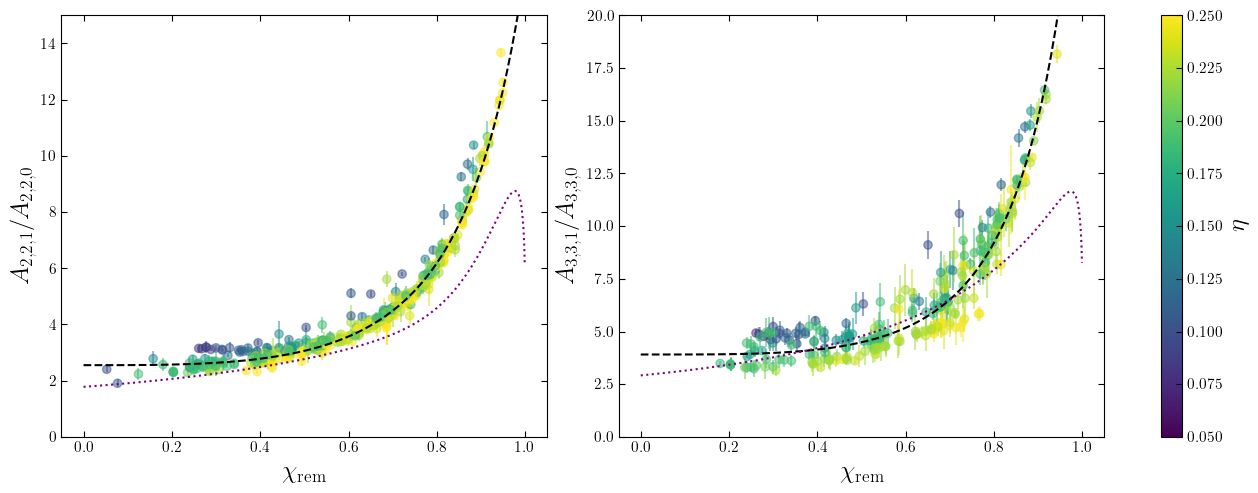

In [22]:
alpha = 0.5
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
popt1, pcov1, sc = plot_mode_relationship(df, [(2, 2, '2.2.0'), (2, 2, '2.2.1')], 
'chi_rem', fit = True, cmap = cmap, norm = normalizer, ax = axs[0], alpha = alpha)
popt2, pcov2, sc = plot_mode_relationship(df, [(3, 3, '3.3.0'), (3, 3, '3.3.1')], 
'chi_rem', fit = True, cmap = cmap, norm = normalizer, ax = axs[1], skip_num = [204], alpha = alpha)
for ax in axs:
    ax.set_ylim(0, None)
axs[0].set_ylabel(r"$A_{2{,}2{,}1}/A_{2{,}2{,}0}$")
axs[1].set_ylabel(r"$A_{3{,}3{,}1}/A_{3{,}3{,}0}$")

axs[0].plot(a_arr, norm_B221_220, color = 'purple', ls = ':', zorder = 300)
axs[1].plot(a_arr, norm_B331_330, color = 'purple', ls = ':', zorder = 300)

im=cm.ScalarMappable(norm=normalizer, cmap=cmap)

axs[0].set_ylim(0, 15)
axs[1].set_ylim(0, 20)

fig.tight_layout()
cb = fig.colorbar(im, ax = axs, fraction = 0.02)
cb.ax.set_ylabel(r"$\eta$")

plt.savefig(f"../../plots/{runname}_overtone_vs_fund_alpha_{alpha}.pdf", bbox_inches = "tight")

In [21]:
popt1

array([6.51930613, 3.3663273 , 0.50006326])

In [22]:
popt2

array([7.67892439, 3.87708655, 0.66883997])